# KNN

In [ ]:
#!pip show scikit-learn
#!pip install --user scikit-learn==1.3.2

In [2]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

from time import time
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('telecom_preprocessed.csv')
data.head()

,gender,age,married,number_of_dependents,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,...,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
0,0,37,1,0,2,9,5,1,42.39,0,...,1,1,1,1,65.6,593.30,0,381.51,974.81,1
1,1,46,0,0,0,9,5,1,10.69,1,...,0,0,0,1,-4.0,542.40,10,96.21,610.28,1
2,1,50,0,0,0,4,4,1,33.65,0,...,1,0,1,0,73.9,280.85,0,134.60,415.45,0
3,1,78,1,0,1,13,3,1,27.82,0,...,1,0,1,0,98.0,1237.85,0,361.66,1599.51,0
4,0,75,1,0,3,3,5,1,7.38,0,...,1,0,1,1,83.9,267.40,0,22.14,289.54,0


### Entrenamiento y test del modelo de KNN

In [4]:
X = data.drop(columns = "customer_status")
y = data["customer_status"].values

In [5]:
n_neighbors = 5 
#TRAINING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify =y)
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train) 

KNeighborsClassifier()

In [6]:
#TEST
y_pred = knn.predict(X_test)

In [7]:
#Análisis de resultados
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))  
print(confusion_matrix(y_test, y_pred))

Test Accuracy:  0.7996965098634294
              precision    recall  f1-score   support

           0       0.69      0.53      0.60       561
           1       0.83      0.91      0.87      1416

    accuracy                           0.80      1977
   macro avg       0.76      0.72      0.73      1977
weighted avg       0.79      0.80      0.79      1977

[[ 295  266]
 [ 130 1286]]


### Ajuste del número de vecinos (K)

In [8]:
def analysis_of_results(X, y, max_neighbors, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 0)
    scores = []
    fit_time = []
    predict_time = []
    
    for k in range(1, max_neighbors):
        start_time = time()
        knn = KNeighborsClassifier(k)
        knn.fit(X_train, y_train)
        elapsed_time = time() - start_time
        fit_time.append(elapsed_time)

        start_time = time()
        y_pred = knn.predict(X_test)
        elapsed_time = time() - start_time
        predict_time.append(elapsed_time)

        scores.append(accuracy_score(y_test, y_pred))
        
    plt.figure()
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.plot(range(1, max_neighbors), scores)
    #plt.xticks([0,5,10,15,20])
    plt.show()
    
    plt.figure()
    plt.xlabel('k')
    plt.ylabel('time')
    plt.plot(range(1, max_neighbors), fit_time, label='fit')
    plt.plot(range(1, max_neighbors), predict_time, label='predict')
    plt.legend(loc='best')
    plt.show()

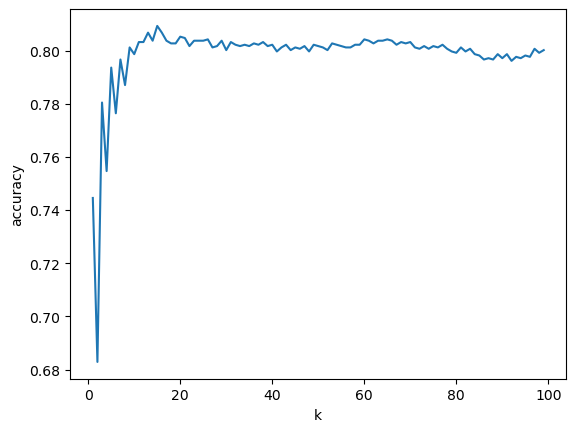

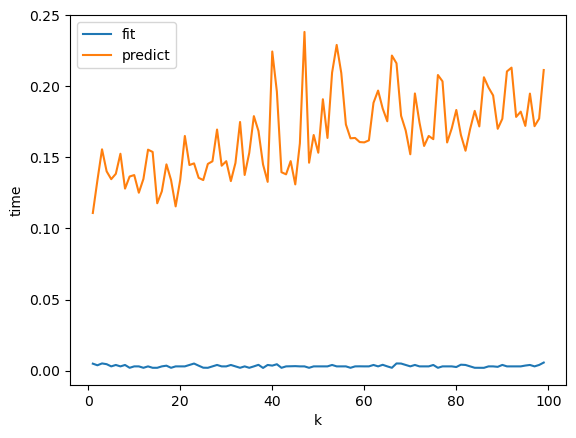

In [9]:
analysis_of_results(X, y, 100, 0.3)

## Ejercicios: 

1. Dados los resultados del análisis anterior, aplica el algoritmo KNN para los valores de k que consideres más adecuados y analiza las métricas obtenidas.
2. Repite los experimentos modificando la partición de los datos para training y test. Observa si existen diferencias en los resultados obtenidos.